# Import Libraries

In [232]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import GridSearchCV, train_test_split, PredefinedSplit
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, roc_curve,\
auc
from sklearn.cluster import KMeans
import re

import pickle

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [4]:
# Import training and test datasets

df_train = pd.read_csv('/Users/chris/Desktop/train.csv')
df_test = pd.read_csv('/Users/chris/Desktop/test.csv')

display(df_train.head())
display(df_test.head())


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# Get summary statistics

display(df_train.describe(include='all'))
display(df_test.describe(include='all'))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


### Observations/Insights

The training set has 891 people and the test set has 418 people.

The passenger class in the training set is slightly higher than that of the test set on average. (2.31 vs. 2.27)

Male is the most common sex for both the training and the test sets.

The average age for the training set is slightly lower than the average age for the test set. (29.7 vs. 30.3)

The average sibling/spouse count for the training set is slightly higher than the average count for the test set. (0.52 vs. 0.45)

The average parent/children count for the training set is about the same as the average count for the test set. (0.38 vs. 0.39)

The average fare for the training set is slightly lower than the average fare for the test set. ($32.20 vs. $35.63)

Southampton is the top POE for both datasets.

In [6]:
# Split training df into survived and died dfs and get summary statistics

df_survived = df_train[df_train['Survived'] == 1]
df_died = df_train[df_train['Survived'] == 0]

display(df_survived.info())
display(df_died.info())

display(df_survived.describe(include='all'))
display(df_died.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  342 non-null    int64  
 1   Survived     342 non-null    int64  
 2   Pclass       342 non-null    int64  
 3   Name         342 non-null    object 
 4   Sex          342 non-null    object 
 5   Age          290 non-null    float64
 6   SibSp        342 non-null    int64  
 7   Parch        342 non-null    int64  
 8   Ticket       342 non-null    object 
 9   Fare         342 non-null    float64
 10  Cabin        136 non-null    object 
 11  Embarked     340 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 34.7+ KB


None

<class 'pandas.core.frame.DataFrame'>
Index: 549 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  549 non-null    int64  
 1   Survived     549 non-null    int64  
 2   Pclass       549 non-null    int64  
 3   Name         549 non-null    object 
 4   Sex          549 non-null    object 
 5   Age          424 non-null    float64
 6   SibSp        549 non-null    int64  
 7   Parch        549 non-null    int64  
 8   Ticket       549 non-null    object 
 9   Fare         549 non-null    float64
 10  Cabin        68 non-null     object 
 11  Embarked     549 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 55.8+ KB


None

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,342.000000,342.0,342.000000,342,342,290.000000,342.000000,342.000000,342,342.000000,136,340
unique,NaN,NaN,NaN,342,2,NaN,NaN,NaN,260,NaN,101,3
top,NaN,NaN,NaN,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,233,NaN,NaN,NaN,5,NaN,4,217
mean,444.368421,1.0,1.950292,NaN,NaN,28.343690,0.473684,0.464912,NaN,48.395408,NaN,NaN
std,252.358840,0.0,0.863321,NaN,NaN,14.950952,0.708688,0.771712,NaN,66.596998,NaN,NaN
min,2.000000,1.0,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,250.750000,1.0,1.000000,NaN,NaN,19.000000,0.000000,0.000000,NaN,12.475000,NaN,NaN
50%,439.500000,1.0,2.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,26.000000,NaN,NaN
75%,651.500000,1.0,3.000000,NaN,NaN,36.000000,1.000000,1.000000,NaN,57.000000,NaN,NaN


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,549.000000,549.0,549.000000,549,549,424.000000,549.000000,549.000000,549,549.000000,68,549
unique,NaN,NaN,NaN,549,2,NaN,NaN,NaN,470,NaN,62,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,468,NaN,NaN,NaN,7,NaN,2,427
mean,447.016393,0.0,2.531876,NaN,NaN,30.626179,0.553734,0.329690,NaN,22.117887,NaN,NaN
std,260.640469,0.0,0.735805,NaN,NaN,14.172110,1.288399,0.823166,NaN,31.388207,NaN,NaN
min,1.000000,0.0,1.000000,NaN,NaN,1.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,211.000000,0.0,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.854200,NaN,NaN
50%,455.000000,0.0,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,10.500000,NaN,NaN
75%,675.000000,0.0,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,26.000000,NaN,NaN


### Observations/Insights

342 people in the training set survived and 549 died.

Passengers who survived were overall of higher class on average than those who died. (1.95 vs. 2.53)

More females survived than males.

Average age of those who survived was about 2 years younger than those who died. (28.3 vs. 30.6)

Those who died had slightly more siblings/spouses on average than those who survived (0.55 vs. 0.47).

Those who survived had more parents/children on board on average than those who died. (0.46 vs. 0.33)

Those who survived spent over twice as much on their tickets on average than people who died. ($48.40 vs. $22.12)

Southampton was the top POE for both passengers who survived and those who died.

In [9]:
# Check nulls

display(df_train.isna().sum())
display(df_test.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [157]:
# Examine Cabin nulls in the train dataframe

cabin_null_df = df_train[df_train['Cabin'].isna()]

print('\033[1mTrain Dataframe (Cabin is Null):\033[0m')
display(cabin_null_df.head())

print('\033[1mTrain Dataframe Summary Statistics (Cabin is Null):\033[0m')
display(cabin_null_df.describe(include='all'))

print('\033[1mTrain Dataframe Summary Statistics (Cabin is NOT Null):\033[0m')
cabin_nonull_df = df_train.dropna(subset='Cabin',axis=0)
display(cabin_nonull_df.describe(include='all'))

print('\033[1mSurvived vs. Died (Cabin is Null):\033[0m')
display(cabin_null_df['Survived'].value_counts(normalize=True))

print('\033[1mSurvived vs. Died (Cabin is NOT Null):\033[0m')
display(cabin_nonull_df['Survived'].value_counts(normalize=True))

print('\033[1mPassenger Class Breakdown (Cabin is Null):\033[0m')
display(cabin_null_df['Pclass'].value_counts(normalize=True))

print('\033[1mPassenger Class Breakdown (Cabin is NOT Null):\033[0m')
display(cabin_nonull_df['Pclass'].value_counts(normalize=True))

Train Dataframe (Cabin is Null):


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ticket_prefix,ticket_num,last_name,first_name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,A/5,21171,Braund,Mr. Owen Harris
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,STON/O2.,3101282,Heikkinen,Miss. Laina
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,373450,Allen,Mr. William Henry
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,NaN,330877,Moran,Mr. James
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,NaN,349909,Palsson,Master. Gosta Leonard


Train Dataframe Summary Statistics (Cabin is Null):


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ticket_prefix,ticket_num,last_name,first_name
count,687.000000,687.000000,687.000000,687,687,529.000000,687.000000,687.000000,687,687.000000,0,687,172,687,687,687
unique,NaN,NaN,NaN,687,2,NaN,NaN,NaN,549,NaN,0,3,39,548,523,613
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,1601,NaN,NaN,S,C.A.,347082,Andersson,Mr. James
freq,NaN,NaN,NaN,1,470,NaN,NaN,NaN,7,NaN,NaN,515,25,7,9,7
mean,443.208151,0.299854,2.639010,NaN,NaN,27.555293,0.547307,0.365357,NaN,19.157325,NaN,NaN,NaN,NaN,NaN,NaN
std,259.215905,0.458528,0.589602,NaN,NaN,13.472634,1.207492,0.827106,NaN,28.663343,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,214.500000,0.000000,2.000000,NaN,NaN,19.000000,0.000000,0.000000,NaN,7.877100,NaN,NaN,NaN,NaN,NaN,NaN
50%,441.000000,0.000000,3.000000,NaN,NaN,26.000000,0.000000,0.000000,NaN,10.500000,NaN,NaN,NaN,NaN,NaN,NaN
75%,664.500000,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,23.000000,NaN,NaN,NaN,NaN,NaN,NaN


Train Dataframe Summary Statistics (Cabin is NOT Null):


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ticket_prefix,ticket_num,last_name,first_name
count,204.000000,204.000000,204.000000,204,204,185.000000,204.000000,204.000000,204,204.000000,204,202,54,204,204,204
unique,NaN,NaN,NaN,204,2,NaN,NaN,NaN,142,NaN,147,3,10,141,158,204
top,NaN,NaN,NaN,"Cumings, Mrs. John Bradley (Florence Briggs Th...",male,NaN,NaN,NaN,113760,NaN,B96 B98,S,PC,113760,Carter,Mrs. John Bradley (Florence Briggs Thayer)
freq,NaN,NaN,NaN,1,107,NaN,NaN,NaN,4,NaN,4,129,42,4,4,1
mean,455.401961,0.666667,1.196078,NaN,NaN,35.829297,0.441176,0.436275,NaN,76.141504,NaN,NaN,NaN,NaN,NaN,NaN
std,251.379279,0.472564,0.525961,NaN,NaN,15.679356,0.628918,0.729976,NaN,74.391749,NaN,NaN,NaN,NaN,NaN,NaN
min,2.000000,0.000000,1.000000,NaN,NaN,0.920000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,261.750000,0.000000,1.000000,NaN,NaN,24.000000,0.000000,0.000000,NaN,29.453125,NaN,NaN,NaN,NaN,NaN,NaN
50%,457.500000,1.000000,1.000000,NaN,NaN,36.000000,0.000000,0.000000,NaN,55.220850,NaN,NaN,NaN,NaN,NaN,NaN
75%,684.000000,1.000000,1.000000,NaN,NaN,48.000000,1.000000,1.000000,NaN,89.328150,NaN,NaN,NaN,NaN,NaN,NaN


Survived vs. Died (Cabin is Null):


Survived
0    0.700146
1    0.299854
Name: proportion, dtype: float64

Survived vs. Died (Cabin is NOT Null):


Survived
1    0.666667
0    0.333333
Name: proportion, dtype: float64

Passenger Class Breakdown (Cabin is Null):


Pclass
3    0.697234
2    0.244541
1    0.058224
Name: proportion, dtype: float64

Passenger Class Breakdown (Cabin is NOT Null):


Pclass
1    0.862745
2    0.078431
3    0.058824
Name: proportion, dtype: float64

In [158]:
# Examine Age nulls in the train dataframe

age_null_df = df_train[df_train['Age'].isna()]

print('\033[1mTrain Dataframe (Age is Null):\033[0m')
display(age_null_df.head())

print('\033[1mTrain Dataframe Summary Statistics (Age is Null):\033[0m')
display(age_null_df.describe(include='all'))

print('\033[1mTrain Dataframe Summary Statistics (Age is NOT Null):\033[0m')
age_nonull_df = df_train.dropna(subset='Age',axis=0)
display(age_nonull_df.describe(include='all'))

print('\033[1mSurvived vs. Died (Age is Null):\033[0m')
display(age_null_df['Survived'].value_counts(normalize=True))

print('\033[1mSurvived vs. Died (Age is NOT Null):\033[0m')
display(age_nonull_df['Survived'].value_counts(normalize=True))

print('\033[1mPassenger Class Breakdown (Age is Null):\033[0m')
display(age_null_df['Pclass'].value_counts(normalize=True))

print('\033[1mPassenger Class Breakdown (Age is NOT Null):\033[0m')
display(age_nonull_df['Pclass'].value_counts(normalize=True))

Train Dataframe (Age is Null):


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ticket_prefix,ticket_num,last_name,first_name
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,NaN,330877,Moran,Mr. James
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,NaN,244373,Williams,Mr. Charles Eugene
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,NaN,2649,Masselmani,Mrs. Fatima
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,NaN,2631,Emir,Mr. Farred Chehab
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,NaN,330959,O'Dwyer,"Miss. Ellen ""Nellie"""


Train Dataframe Summary Statistics (Age is Null):


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ticket_prefix,ticket_num,last_name,first_name
count,177.000000,177.000000,177.000000,177,177,0.0,177.000000,177.000000,177,177.000000,19,177,37,177,177,177
unique,NaN,NaN,NaN,177,2,NaN,NaN,NaN,155,NaN,19,3,15,155,150,163
top,NaN,NaN,NaN,"Moran, Mr. James",male,NaN,NaN,NaN,CA. 2343,NaN,B78,S,PC,2343,Sage,Mr. John
freq,NaN,NaN,NaN,1,124,NaN,NaN,NaN,7,NaN,1,90,10,7,7,5
mean,435.581921,0.293785,2.598870,NaN,NaN,NaN,0.564972,0.180791,NaN,22.158567,NaN,NaN,NaN,NaN,NaN,NaN
std,250.552901,0.456787,0.763216,NaN,NaN,NaN,1.626316,0.534145,NaN,31.874608,NaN,NaN,NaN,NaN,NaN,NaN
min,6.000000,0.000000,1.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,230.000000,0.000000,3.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,7.750000,NaN,NaN,NaN,NaN,NaN,NaN
50%,452.000000,0.000000,3.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,8.050000,NaN,NaN,NaN,NaN,NaN,NaN
75%,634.000000,1.000000,3.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,24.150000,NaN,NaN,NaN,NaN,NaN,NaN


Train Dataframe Summary Statistics (Age is NOT Null):


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ticket_prefix,ticket_num,last_name,first_name
count,714.000000,714.000000,714.000000,714,714,714.000000,714.000000,714.000000,714,714.000000,185,712,189,714,714,714
unique,NaN,NaN,NaN,714,2,NaN,NaN,NaN,542,NaN,134,3,38,541,535,664
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,G6,S,PC,347082,Andersson,Mr. William
freq,NaN,NaN,NaN,1,453,NaN,NaN,NaN,7,NaN,4,554,50,7,9,5
mean,448.582633,0.406162,2.236695,NaN,NaN,29.699118,0.512605,0.431373,NaN,34.694514,NaN,NaN,NaN,NaN,NaN,NaN
std,259.119524,0.491460,0.838250,NaN,NaN,14.526497,0.929783,0.853289,NaN,52.918930,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,222.250000,0.000000,1.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,8.050000,NaN,NaN,NaN,NaN,NaN,NaN
50%,445.000000,0.000000,2.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,15.741700,NaN,NaN,NaN,NaN,NaN,NaN
75%,677.750000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,1.000000,NaN,33.375000,NaN,NaN,NaN,NaN,NaN,NaN


Survived vs. Died (Age is Null):


Survived
0    0.706215
1    0.293785
Name: proportion, dtype: float64

Survived vs. Died (Age is NOT Null):


Survived
0    0.593838
1    0.406162
Name: proportion, dtype: float64

Passenger Class Breakdown (Age is Null):


Pclass
3    0.768362
1    0.169492
2    0.062147
Name: proportion, dtype: float64

Passenger Class Breakdown (Age is NOT Null):


Pclass
3    0.497199
1    0.260504
2    0.242297
Name: proportion, dtype: float64

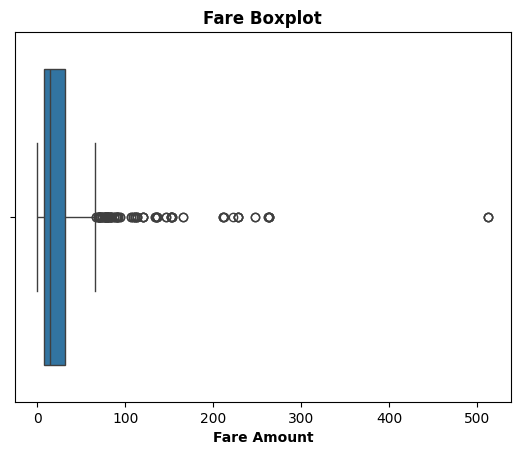

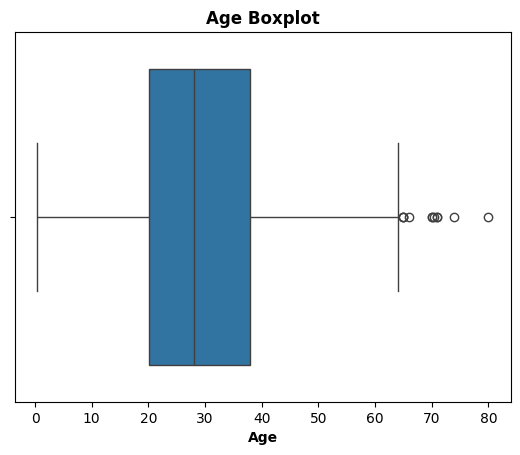

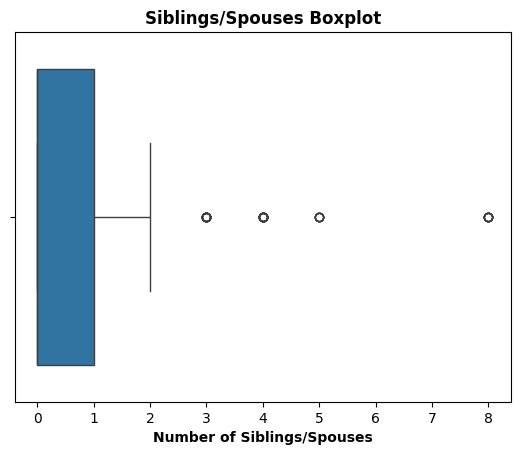

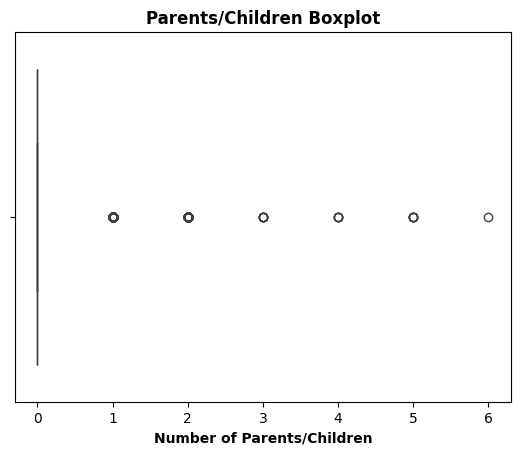

In [55]:
# Check outliers

g = sns.boxplot(x=df_train['Fare']);
g.set_title('Fare Boxplot',fontweight='bold');
g.set_xlabel('Fare Amount',fontweight='bold');
plt.show()

g = sns.boxplot(x=df_train['Age']);
g.set_title('Age Boxplot',fontweight='bold');
g.set_xlabel('Age',fontweight='bold');
plt.show()

g = sns.boxplot(x=df_train['SibSp']);
g.set_title('Siblings/Spouses Boxplot',fontweight='bold');
g.set_xlabel('Number of Siblings/Spouses',fontweight='bold');
plt.show()

g = sns.boxplot(x=df_train['Parch']);
g.set_title('Parents/Children Boxplot',fontweight='bold');
g.set_xlabel('Number of Parents/Children',fontweight='bold');
plt.show()

In [57]:
# Determine the number of rows containing outliers for 'Fare'

percentile25 = df_train['Fare'].quantile(0.25)
percentile75 = df_train['Fare'].quantile(0.75)

iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print('\033[1mFare Upper Limit:\033[0m',upper_limit)
print('\033[1mFare Lower Limit:\033[0m',lower_limit)

fare_outliers = df_train[df_train['Fare'] > upper_limit]

display(df_train[df_train['Fare'] < lower_limit])
display(df_train[df_train['Fare'] > upper_limit])

print('\033[1m# Outliers Below Lower Limit:\033[0m',df_train[df_train['Fare'] < lower_limit].shape[0])
print('\n')
print('\033[1m# Outliers Above Upper Limit:\033[0m',df_train[df_train['Fare'] > upper_limit].shape[0])
print('\n')
print('\033[1m# Outliers Above Upper Limit (Survivors):\033[0m',df_train[(df_train['Fare'] > upper_limit) & (df_train['Survived'] == 1)].shape[0])
print('\n')
print('\033[1m# Outliers Above Upper Limit (Dead):\033[0m',df_train[(df_train['Fare'] > upper_limit) & (df_train['Survived'] == 0)].shape[0])
print('\n')
print('\033[1m% of Data that are Outliers:\033[0m',round((len(fare_outliers)/(len(df_train)))*100,3),'%')

Fare Upper Limit: 65.6344
Fare Lower Limit: -26.724


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
...,...,...,...,...,...,...,...,...,...,...,...,...
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.5500,NaN,S
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,C92,C
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S


# Outliers Below Lower Limit: 0


# Outliers Above Upper Limit: 116


# Outliers Above Upper Limit (Survivors): 79


# Outliers Above Upper Limit (Dead): 37


% of Data that are Outliers: 13.019 %


In [58]:
# Determine the number of rows containing outliers for 'Age'

percentile25 = df_train['Age'].quantile(0.25)
percentile75 = df_train['Age'].quantile(0.75)

iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print('\033[1mAge Upper Limit:\033[0m',upper_limit)
print('\033[1mAge Lower Limit:\033[0m',lower_limit)

age_outliers = df_train[df_train['Age'] > upper_limit]

display(df_train[df_train['Age'] < lower_limit])
display(df_train[df_train['Age'] > upper_limit])

print('\033[1m# Outliers Below Lower Limit:\033[0m',df_train[df_train['Age'] < lower_limit].shape[0])
print('\n')
print('\033[1m# Outliers Above Upper Limit:\033[0m',df_train[df_train['Age'] > upper_limit].shape[0])
print('\n')
print('\033[1m# Outliers Above Upper Limit (Survivors):\033[0m',df_train[(df_train['Age'] > upper_limit) & (df_train['Survived'] == 1)].shape[0])
print('\n')
print('\033[1m# Outliers Above Upper Limit (Dead):\033[0m',df_train[(df_train['Age'] > upper_limit) & (df_train['Survived'] == 0)].shape[0])
print('\n')
print('\033[1m% of Data that are Outliers:\033[0m',round((len(age_outliers)/(len(df_train)))*100,3),'%')

Age Upper Limit: 64.8125
Age Lower Limit: -6.6875


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
456,457,0,1,"Millet, Mr. Francis Davis",male,65.0,0,0,13509,26.5500,E38,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S


# Outliers Below Lower Limit: 0


# Outliers Above Upper Limit: 11


# Outliers Above Upper Limit (Survivors): 1


# Outliers Above Upper Limit (Dead): 10


% of Data that are Outliers: 1.235 %


In [59]:
# Determine the number of rows containing outliers for 'SibSp'

percentile25 = df_train['SibSp'].quantile(0.25)
percentile75 = df_train['SibSp'].quantile(0.75)

iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print('\033[1mSibSp Upper Limit:\033[0m',upper_limit)
print('\033[1mSibSp Lower Limit:\033[0m',lower_limit)

sibsp_outliers = df_train[df_train['SibSp'] > upper_limit]

display(df_train[df_train['SibSp'] < lower_limit])
display(df_train[df_train['SibSp'] > upper_limit])

print('\033[1m# Outliers Below Lower Limit:\033[0m',df_train[df_train['SibSp'] < lower_limit].shape[0])
print('\n')
print('\033[1m# Outliers Above Upper Limit:\033[0m',df_train[df_train['SibSp'] > upper_limit].shape[0])
print('\n')
print('\033[1m# Outliers Above Upper Limit (Survivors):\033[0m',df_train[(df_train['SibSp'] > upper_limit) & (df_train['Survived'] == 1)].shape[0])
print('\n')
print('\033[1m# Outliers Above Upper Limit (Dead):\033[0m',df_train[(df_train['SibSp'] > upper_limit) & (df_train['Survived'] == 0)].shape[0])
print('\n')
print('\033[1m% of Data that are Outliers:\033[0m',round((len(sibsp_outliers)/(len(df_train)))*100,3),'%')

Age Upper Limit: 2.5
Age Lower Limit: -1.5


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
50,51,0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,NaN,S
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,NaN,S
63,64,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9000,NaN,S
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,NaN,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9000,NaN,S
85,86,1,3,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",female,33.0,3,0,3101278,15.8500,NaN,S


# Outliers Below Lower Limit: 0


# Outliers Above Upper Limit: 46


# Outliers Above Upper Limit (Survivors): 7


# Outliers Above Upper Limit (Dead): 39


% of Data that are Outliers: 5.163 %


In [10]:
# Trim any extra whitespace from strings

df_train.map(lambda x: x.strip() if type(x)==str else x)
df_test.map(lambda x: x.strip() if type(x)==str else x)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [33]:
# Explore cabins by fare for survived vs. died

avg_fare_by_cabin = df_train.groupby('Cabin')['Fare'].mean().sort_values(ascending=False).reset_index()

#display(avg_fare_by_cabin)

survived_by_cabin = df_train.groupby('Cabin')['Survived'].sum().sort_values(ascending=False).reset_index()

#display(survived_by_cabin)

passengers_per_cabin = df_train.groupby('Cabin')['PassengerId'].count().sort_values(ascending=False).reset_index()

#display(passengers_per_cabin)

cabin_df = pd.DataFrame(avg_fare_by_cabin)
survived_cabin_df = pd.DataFrame(survived_by_cabin)
passengers_cabin_df = pd.DataFrame(passengers_per_cabin)

cabin_df = cabin_df.merge(survived_cabin_df,how='outer',on='Cabin')
cabin_df = cabin_df.merge(passengers_cabin_df,how='outer',on='Cabin')
cabin_df['survived_%'] = cabin_df['Survived']/cabin_df['PassengerId']
cabin_df = cabin_df.rename(columns={'Fare':'avg_fare','PassengerId':'num_passengers'})

display(cabin_df)

cabins_survived_df = cabin_df[cabin_df['survived_%'] == 1.0]
cabins_died_df = cabin_df[cabin_df['survived_%'] == 0.0]

print('\033[1mCabins Everyone Survived:\033[0m')
display(cabins_survived_df)
print('\033[1mAVG Cabin Fare:\033[0m',cabins_survived_df['avg_fare'].mean())
print('\033[1mMedian Cabin Fare:\033[0m',cabins_survived_df['avg_fare'].median())
print('\n')

print('\033[1mCabins Everyone Died:\033[0m')
display(cabins_died_df)
print('\033[1mAVG Cabin Fare:\033[0m',cabins_died_df['avg_fare'].mean())
print('\033[1mMedian Cabin Fare:\033[0m',cabins_died_df['avg_fare'].median())

,Cabin,avg_fare,Survived,num_passengers,survived_%
0,B101,512.3292,1,1,1.0
1,C23 C25 C27,263.0000,2,4,0.5
2,B57 B59 B63 B66,262.3750,2,2,1.0
3,B51 B53 B55,258.6646,1,2,0.5
4,B58 B60,247.5208,1,2,0.5
...,...,...,...,...,...
142,F G63,7.6500,0,1,0.0
143,F G73,7.6500,0,2,0.0
144,A36,0.0000,0,1,0.0
145,B94,0.0000,0,1,0.0


Cabins Everyone Survived:


,Cabin,avg_fare,Survived,num_passengers,survived_%
0,B101,512.329200,1,1,1.0
2,B57 B59 B63 B66,262.375000,2,2,1.0
5,C62 C64,227.525000,1,1,1.0
6,C45,227.525000,1,1,1.0
9,B3,211.337500,1,1,1.0
...,...,...,...,...,...
135,D56,13.000000,1,1,1.0
136,E121,12.475000,2,2,1.0
137,E101,11.950000,3,3,1.0
138,F33,11.333333,3,3,1.0


AVG Cabin Fare: 78.88362745098038
Median Cabin Fare: 57.9792


Cabins Everyone Died:


,Cabin,avg_fare,Survived,num_passengers,survived_%
7,C95,221.7792,0,1,0.0
8,C82,211.5000,0,1,0.0
12,C91,153.4625,0,1,0.0
22,D48,113.2750,0,1,0.0
27,C86,106.4250,0,1,0.0
45,B86,79.2000,0,1,0.0
46,B82 B84,79.2000,0,1,0.0
47,C46,78.8500,0,1,0.0
52,D26,77.2875,0,2,0.0
62,B30,61.9792,0,1,0.0


AVG Cabin Fare: 49.751810869565226
Median Cabin Fare: 34.337500000000006


In [181]:
# Explore by Pclass

#df_train['ticket_num'] == df_train['ticket_num'].astype(int)
line_tns = df_train[df_train['ticket_num'] == "LINE"]
#display(line_tns)

# 1st Class
pclass1_df = df_train[df_train['Pclass'] == 1]
pclass1_df['ticket_num'] = pclass1_df['ticket_num'].astype(int)
display(pclass1_df)
display(pclass1_df.describe(include='all'))
display(pclass1_df.isna().sum())
display(pclass1_df['Embarked'].value_counts(normalize=True))
print('\n')
print('\033[1mNumber of 1st Class Cabin Letter Designation Combination Occurrences by Passenger:\033[0m')
print(pclass1_df['Cabin'].str.findall('([a-zA-Z]+)').value_counts())
print('\n')
print('\033[1mNumber of Unique Passengers by 1st Class Cabin Letter Designation:\033[0m')
print(pclass1_df['Cabin'].str.extract('([a-zA-Z]+)').value_counts()) # only counts one occurrence per cell
print('\n')
print('\033[1mTotal Number of 1st Class A Cabin Assignments:\033[0m',pclass1_df['Cabin'].str.count('A').sum())
print('\033[1mTotal Number of 1st Class B Cabin Assignments:\033[0m',pclass1_df['Cabin'].str.count('B').sum())
print('\033[1mTotal Number of 1st Class C Cabin Assignments:\033[0m',pclass1_df['Cabin'].str.count('C').sum())
print('\033[1mTotal Number of 1st Class D Cabin Assignments:\033[0m',pclass1_df['Cabin'].str.count('D').sum())
print('\033[1mTotal Number of 1st Class E Cabin Assignments:\033[0m',pclass1_df['Cabin'].str.count('E').sum())
print('\033[1mTotal Number of 1st Class T Cabin Assignments:\033[0m',pclass1_df['Cabin'].str.count('T').sum())

# 2nd Class
pclass2_df = df_train[df_train['Pclass'] == 2]
pclass2_df['ticket_num'] = pclass2_df['ticket_num'].astype(int)
display(pclass2_df)
display(pclass2_df.describe(include='all'))
display(pclass2_df.isna().sum())
display(pclass2_df['Embarked'].value_counts(normalize=True))
print('\n')
print('\033[1mNumber of 2nd Class Cabin Letter Designation Combination Occurrences by Passenger:\033[0m')
print(pclass2_df['Cabin'].str.findall('([a-zA-Z]+)').value_counts())
print('\n')
print('\033[1mNumber of Unique Passengers by 2nd Class Cabin Letter Designation:\033[0m')
print(pclass2_df['Cabin'].str.extract('([a-zA-Z]+)').value_counts()) # only counts one occurrence per cell
print('\n')
print('\033[1mTotal Number of 2nd Class D Cabin Assignments:\033[0m',pclass2_df['Cabin'].str.count('D').sum())
print('\033[1mTotal Number of 2nd Class E Cabin Assignments:\033[0m',pclass2_df['Cabin'].str.count('E').sum())
print('\033[1mTotal Number of 2nd Class F Cabin Assignments:\033[0m',pclass2_df['Cabin'].str.count('F').sum())

# 3rd Class
pclass3_df = df_train[df_train['Pclass'] == 3]
pclass3_df = pclass3_df[pclass3_df['ticket_num'] != 'LINE']
pclass3_df['ticket_num'] = pclass3_df['ticket_num'].astype(int)
display(pclass3_df)
display(pclass3_df.describe(include='all'))
display(pclass3_df.isna().sum())
display(pclass3_df['Embarked'].value_counts(normalize=True))
print('\n')
print('\033[1mNumber of 3rd Class Cabin Letter Designation Combination Occurrences by Passenger:\033[0m')
print(pclass3_df['Cabin'].str.findall('([a-zA-Z]+)').value_counts())
print('\n')
print('\033[1mNumber of Unique Passengers by 3rd Class Cabin Letter Designation:\033[0m')
print(pclass3_df['Cabin'].str.extract('([a-zA-Z]+)').value_counts()) # only counts one occurrence per cell
print('\n')
print('\033[1mTotal Number of 3rd Class E Cabin Assignments:\033[0m',pclass3_df['Cabin'].str.count('E').sum())
print('\033[1mTotal Number of 3rd Class F Cabin Assignments:\033[0m',pclass3_df['Cabin'].str.count('F').sum())
print('\033[1mTotal Number of 3rd Class G Cabin Assignments:\033[0m',pclass3_df['Cabin'].str.count('G').sum())

display(df_train.groupby('Pclass')['Fare'].mean())

/var/folders/gh/bhd7smwx0pnb4p234kf26pp80000gp/T/ipykernel_2381/1262683522.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pclass1_df['ticket_num'] = pclass1_df['ticket_num'].astype(int)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ticket_prefix,ticket_num,last_name,first_name
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,PC,17599,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,NaN,113803,Futrelle,Mrs. Jacques Heath (Lily May Peel)
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,NaN,17463,McCarthy,Mr. Timothy J
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,NaN,113783,Bonnell,Miss. Elizabeth
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S,NaN,113788,Sloper,Mr. William Thompson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,NaN,11751,Beckwith,Mrs. Richard Leonard (Sallie Monypeny)
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S,NaN,695,Carlsson,Mr. Frans Olof
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,NaN,11767,Potter,Mrs. Thomas Jr (Lily Alexenia Wilson)
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,NaN,112053,Graham,Miss. Margaret Edith


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ticket_prefix,ticket_num,last_name,first_name
count,216.000000,216.000000,216.0,216,216,186.000000,216.000000,216.000000,216,216.000000,176,214,64,216.000000,216,216
unique,NaN,NaN,NaN,216,2,NaN,NaN,NaN,147,NaN,133,3,4,NaN,172,214
top,NaN,NaN,NaN,"Cumings, Mrs. John Bradley (Florence Briggs Th...",male,NaN,NaN,NaN,17421,NaN,B96 B98,S,PC,NaN,Carter,Mr. Victor
freq,NaN,NaN,NaN,1,122,NaN,NaN,NaN,4,NaN,4,127,60,NaN,4,2
mean,461.597222,0.629630,1.0,NaN,NaN,38.233441,0.416667,0.356481,NaN,84.154687,NaN,NaN,NaN,49791.268519,NaN,NaN
std,246.737616,0.484026,0.0,NaN,NaN,14.802856,0.611898,0.693997,NaN,78.380373,NaN,NaN,NaN,45009.334714,NaN,NaN
min,2.000000,0.000000,1.0,NaN,NaN,0.920000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,693.000000,NaN,NaN
25%,270.750000,0.000000,1.0,NaN,NaN,27.000000,0.000000,0.000000,NaN,30.923950,NaN,NaN,NaN,17476.750000,NaN,NaN
50%,472.000000,1.000000,1.0,NaN,NaN,37.000000,0.000000,0.000000,NaN,60.287500,NaN,NaN,NaN,17761.000000,NaN,NaN
75%,670.500000,1.000000,1.0,NaN,NaN,49.000000,1.000000,0.000000,NaN,93.500000,NaN,NaN,NaN,111583.500000,NaN,NaN


PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age               30
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin             40
Embarked           2
ticket_prefix    152
ticket_num         0
last_name          0
first_name         0
dtype: int64

Embarked
S    0.593458
C    0.397196
Q    0.009346
Name: proportion, dtype: float64



Number of 1st Class Cabin Letter Designation Combination Occurrences by Passenger:
Cabin
[C]             51
[B]             36
[D]             28
[E]             25
[A]             15
[B, B]           7
[C, C, C]        4
[C, C]           4
[B, B, B, B]     2
[B, B, B]        2
[D, D]           1
[T]              1
Name: count, dtype: int64


Number of Unique Passengers by 1st Class Cabin Letter Designation:
C    59
B    47
D    29
E    25
A    15
T     1
Name: count, dtype: int64


Total Number of 1st Class A Cabin Assignments: 15.0
Total Number of 1st Class B Cabin Assignments: 64.0
Total Number of 1st Class C Cabin Assignments: 71.0
Total Number of 1st Class D Cabin Assignments: 30.0
Total Number of 1st Class E Cabin Assignments: 25.0
Total Number of 1st Class T Cabin Assignments: 1.0


/var/folders/gh/bhd7smwx0pnb4p234kf26pp80000gp/T/ipykernel_2381/1262683522.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pclass2_df['ticket_num'] = pclass2_df['ticket_num'].astype(int)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ticket_prefix,ticket_num,last_name,first_name
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,NaN,237736,Nasser,Mrs. Nicholas (Adele Achem)
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S,NaN,248706,Hewlett,Mrs. (Mary D Kingcome)
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,NaN,244373,Williams,Mr. Charles Eugene
20,21,0,2,"Fynney, Mr. Joseph J",male,35.0,0,0,239865,26.0000,NaN,S,NaN,239865,Fynney,Mr. Joseph J
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S,NaN,248698,Beesley,Mr. Lawrence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866,867,1,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,SC/PARIS 2149,13.8583,NaN,C,SC/PARIS,2149,Duran y More,Miss. Asuncion
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C,P/PP,3381,Abelson,Mrs. Samuel (Hannah Wizosky)
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S,NaN,230433,Shelley,Mrs. William (Imanita Parrish Hall)
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S,C.A./SOTON,34068,Banfield,Mr. Frederick James


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ticket_prefix,ticket_num,last_name,first_name
count,184.000000,184.000000,184.0,184,184,173.000000,184.000000,184.000000,184,184.000000,16,184,57,184.000000,184,184
unique,NaN,NaN,NaN,184,2,NaN,NaN,NaN,140,NaN,7,3,18,NaN,147,177
top,NaN,NaN,NaN,"Nasser, Mrs. Nicholas (Adele Achem)",male,NaN,NaN,NaN,S.O.C. 14879,NaN,F33,S,C.A.,NaN,Brown,Mr. William John
freq,NaN,NaN,NaN,1,108,NaN,NaN,NaN,5,NaN,3,164,19,NaN,3,3
mean,445.956522,0.472826,2.0,NaN,NaN,29.877630,0.402174,0.380435,NaN,20.662183,NaN,NaN,NaN,123399.809783,NaN,NaN
std,250.852161,0.500623,0.0,NaN,NaN,14.001077,0.601633,0.690963,NaN,13.417399,NaN,NaN,NaN,110726.424238,NaN,NaN
min,10.000000,0.000000,2.0,NaN,NaN,0.670000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,3.000000,NaN,NaN
25%,234.500000,0.000000,2.0,NaN,NaN,23.000000,0.000000,0.000000,NaN,13.000000,NaN,NaN,NaN,24579.750000,NaN,NaN
50%,435.500000,0.000000,2.0,NaN,NaN,29.000000,0.000000,0.000000,NaN,14.250000,NaN,NaN,NaN,34143.000000,NaN,NaN
75%,668.000000,1.000000,2.0,NaN,NaN,36.000000,1.000000,1.000000,NaN,26.000000,NaN,NaN,NaN,239853.000000,NaN,NaN


PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age               11
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            168
Embarked           0
ticket_prefix    127
ticket_num         0
last_name          0
first_name         0
dtype: int64

Embarked
S    0.891304
C    0.092391
Q    0.016304
Name: proportion, dtype: float64



Number of 2nd Class Cabin Letter Designation Combination Occurrences by Passenger:
Cabin
[F]    8
[D]    4
[E]    4
Name: count, dtype: int64


Number of Unique Passengers by 2nd Class Cabin Letter Designation:
F    8
D    4
E    4
Name: count, dtype: int64


Total Number of 2nd Class D Cabin Assignments: 4.0
Total Number of 2nd Class E Cabin Assignments: 4.0
Total Number of 2nd Class F Cabin Assignments: 8.0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ticket_prefix,ticket_num,last_name,first_name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,A/5,21171,Braund,Mr. Owen Harris
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,STON/O2.,3101282,Heikkinen,Miss. Laina
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,373450,Allen,Mr. William Henry
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,NaN,330877,Moran,Mr. James
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,NaN,349909,Palsson,Master. Gosta Leonard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S,NaN,7552,Dahlberg,Miss. Gerda Ulrika
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,SOTON/OQ,392076,Sutehall,Mr. Henry Jr
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q,NaN,382652,Rice,Mrs. William (Margaret Norton)
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,W./C.,6607,Johnston,"Miss. Catherine Helen ""Carrie"""


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ticket_prefix,ticket_num,last_name,first_name
count,487.000000,487.000000,487.0,487,487,351.000000,487.000000,487.000000,487,487.000000,12,487,105,4.870000e+02,487,487
unique,NaN,NaN,NaN,487,2,NaN,NaN,NaN,393,NaN,7,3,23,NaN,365,444
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,1601,NaN,G6,S,STON/O,NaN,Andersson,Mr. James
freq,NaN,NaN,NaN,1,343,NaN,NaN,NaN,7,NaN,4,349,12,NaN,9,7
mean,439.983573,0.242300,3.0,NaN,NaN,25.059601,0.620123,0.396304,NaN,13.787875,NaN,NaN,NaN,4.746547e+05,NaN,NaN
std,264.987545,0.428915,0.0,NaN,NaN,12.483653,1.379392,0.891793,NaN,11.760718,NaN,NaN,NaN,8.442047e+05,NaN,NaN
min,1.000000,0.000000,3.0,NaN,NaN,0.420000,0.000000,0.000000,NaN,4.012500,NaN,NaN,NaN,7.510000e+02,NaN,NaN
25%,200.000000,0.000000,3.0,NaN,NaN,18.000000,0.000000,0.000000,NaN,7.750000,NaN,NaN,NaN,6.608000e+03,NaN,NaN
50%,434.000000,0.000000,3.0,NaN,NaN,24.000000,0.000000,0.000000,NaN,8.050000,NaN,NaN,NaN,3.470610e+05,NaN,NaN
75%,668.500000,0.000000,3.0,NaN,NaN,32.000000,1.000000,0.000000,NaN,15.500000,NaN,NaN,NaN,3.632910e+05,NaN,NaN


PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age              136
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            475
Embarked           0
ticket_prefix    382
ticket_num         0
last_name          0
first_name         0
dtype: int64

Embarked
S    0.716632
Q    0.147844
C    0.135524
Name: proportion, dtype: float64



Number of 3rd Class Cabin Letter Designation Combination Occurrences by Passenger:
Cabin
[G]       4
[F, G]    3
[E]       3
[F, E]    1
[F]       1
Name: count, dtype: int64


Number of Unique Passengers by 3rd Class Cabin Letter Designation:
F    5
G    4
E    3
Name: count, dtype: int64


Total Number of 3rd Class E Cabin Assignments: 4.0
Total Number of 3rd Class F Cabin Assignments: 5.0
Total Number of 3rd Class G Cabin Assignments: 7.0


Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

### Observations/Insights

3rd class had the most passengers (491), 1st class had the second-most number of passengers (216), and 2nd class had the least number of passengers (184).

Passengers in first class paid the most ($84.15 on avg), 2nd class passengers paid the next most ($20.66 on avg), and passengers in 3rd class paid the least ($13.68 on avg).

Almost all passengers in 3rd class do not have cabin assignments listed (479 out of 491), most passengers in 2nd class don't have cabin assignments listed (168 out of 184), and most passengers in 1st class DO have cabin assignments listed (176 out of 216).

Passengers in 1st class were older on average than passengers in other classes (38 vs. ~30 for 2nd class and ~25 for 3rd class).

A higher percentage of 1st class passengers survived than other classes of passengers (~63% for 1st class, ~47% for 2nd class, and ~24% for 3rd class).

Males made up a majority of the passengers for each class and made up the greatest percentage of passengers in 3rd class (~56.5% for 1st class, ~58.7% for 2nd class, and ~70.7% for 3rd class).

3rd class passengers had greater numbers of siblings/spouses than the other two classes (~0.62 vs. ~0.42 for 1st class and ~0.40 for 2nd class).

The numbers of parents/children accompanying passengers had a tighter spread across classes (~0.36 for 1st class, ~0.38 for 2nd class, and ~0.39 for 3rd class).

Southampton was the most common POE across classes. 2nd class passengers had the greatest percentage of passengers who embarked from Southampton (~89% vs. ~0.72% for 3rd class and ~0.59% for 1st class). 1st class passengers had the highest percentage of passengers embark from Cherbourg (~39% vs. ~13% for 3rd class and ~9% for 2nd class).

Four men in 3rd class had ticket numbers with cost of $0 whose ticket number was "LINE". It's possible these men worked on the ship. These will be dropped from each dataset to change the ticket number column to 'int' and analyze possible significance of ticket numbers. 

1st class cabin assignments were in A, B, C, D, E, and T, with highest numbers of assignments in B and C. 2nd class cabin assignments were in D, E, and F, with the highest number of passengers in F. 3rd class cabin assignments were in E, F, and G, with the highest number of passengers in G (most 3rd class passengers have null cabin assignments).

In [253]:
# Cabin by Fare, Survived

cabin_fare_df = df_train[['Cabin','Fare','Pclass','Survived']]
cabin_fare_df['cabin_letter_all'] = cabin_fare_df['Cabin'].apply(lambda x: ' '.join(re.findall('[a-zA-Z]+', str(x))) if pd.notnull(x) else x)
cabin_fare_df['cabin_number_all'] = cabin_fare_df['Cabin'].apply(lambda x: ' '.join(re.findall('(\d+)', str(x))) if pd.notnull(x) else x)
cabin_fare_df['cabin_letter_unique'] = cabin_fare_df['Cabin'].apply(lambda x: ' '.join(sorted(set(''.join(re.findall('[a-zA-Z]+', str(x)))))) if pd.notnull(x) else x)
cabin_fare_df['cabin_number_unique'] = cabin_fare_df['Cabin'].apply(lambda x: ' '.join(sorted(set(''.join(re.findall('(\d+)', str(x)))))) if pd.notnull(x) else x)
cabin_fare_df['cabin_mult'] = cabin_fare_df['Cabin'].apply(lambda x: len(x.split()) > 1 if isinstance(x, str) else False)
display(cabin_fare_df.head())
display(cabin_fare_df[cabin_fare_df['cabin_mult'] == True])

avg_cabin_fares = pd.DataFrame(cabin_fare_df.groupby('cabin_letter_unique')['Fare'].mean().sort_values(ascending=False))
avg_cabin_fares = avg_cabin_fares.rename(columns={'Fare':"avg_fare"})
display(avg_cabin_fares)

cabin_fare_df = cabin_fare_df.reset_index(drop=True)
cabin_fare_df['cabin_number_all'] = cabin_fare_df['cabin_number_all'].astype(str).str.split()
cabin_fare_df = cabin_fare_df.explode('cabin_number_all')
display(cabin_fare_df[cabin_fare_df['cabin_mult'] == True].head(10))
display(cabin_fare_df.groupby('cabin_letter_unique')['cabin_number_all'].apply(lambda x: len(set(x))).reset_index())
unique_cabin_numbers = cabin_fare_df.groupby('cabin_letter_unique')['cabin_number_all'].apply(lambda x: set(x.dropna())).reset_index()
#display(unique_cabin_numbers)

# Function to split, convert to integers, and sort the unique cabin numbers
def sort_cabin_numbers(numbers):
    # Initialize a set to store unique numbers
    unique_numbers = set()
    
    for num_str in numbers:
        # Check if num_str is a string and is digit
        if isinstance(num_str, str) and num_str.isdigit():
            # Splitting numbers, converting to integers, and adding to the set
            unique_numbers.update([int(num) for num in num_str.split()])

    # Return the unique numbers sorted
    return sorted(unique_numbers)

# Group by 'cabin_letter' and aggregate the sorted 'cabin_number' values
unique_sorted_cabin_numbers = cabin_fare_df.groupby('cabin_letter_unique')['cabin_number_all'].apply(sort_cabin_numbers).reset_index()
unique_sorted_cabin_numbers = unique_sorted_cabin_numbers.rename(columns=({'cabin_number_all':'unique_cabin_numbers'}))
unique_sorted_cabin_numbers['unique_cabin_number_ct'] = unique_sorted_cabin_numbers['unique_cabin_numbers'].apply(lambda x: len(x))
display(unique_sorted_cabin_numbers)

cabin_letter_survived_pct = cabin_fare_df.groupby('cabin_letter_unique')['Survived'].value_counts(normalize=True)
cabin_letter_survived_cts = cabin_fare_df.groupby('cabin_letter_unique')['Survived'].value_counts()
combined_cabin_letter_survived_df = pd.DataFrame({'Counts':cabin_letter_survived_cts,'Percentage':cabin_letter_survived_pct})
display(combined_cabin_letter_survived_df)

pclass_cabin_letter_survived_pct = cabin_fare_df.groupby(['Pclass','cabin_letter_unique'])['Survived'].value_counts(normalize=True)
pclass_cabin_letter_survived_cts = cabin_fare_df.groupby(['Pclass','cabin_letter_unique'])['Survived'].value_counts()
combined_pclass_cabin_letter_survived_df = pd.DataFrame({'Counts':pclass_cabin_letter_survived_cts,'Percentage':pclass_cabin_letter_survived_pct})
display(combined_pclass_cabin_letter_survived_df)

pclass_cabin_letter = pd.DataFrame(cabin_fare_df.groupby('Pclass')['cabin_letter_unique'].value_counts())
display(pclass_cabin_letter)

/var/folders/gh/bhd7smwx0pnb4p234kf26pp80000gp/T/ipykernel_2381/3294526489.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cabin_fare_df['cabin_letter_all'] = cabin_fare_df['Cabin'].apply(lambda x: ' '.join(re.findall('[a-zA-Z]+', str(x))) if pd.notnull(x) else x)
/var/folders/gh/bhd7smwx0pnb4p234kf26pp80000gp/T/ipykernel_2381/3294526489.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cabin_fare_df['cabin_number_all'] = cabin_fare_df['Cabin'].apply(lambda x: ' '.join(re.findall('(\d+)', str(x))) if 

,Cabin,Fare,Pclass,Survived,cabin_letter_all,cabin_number_all,cabin_letter_unique,cabin_number_unique,cabin_mult
0,NaN,7.2500,3,0,NaN,NaN,NaN,NaN,False
1,C85,71.2833,1,1,C,85,C,5 8,False
2,NaN,7.9250,3,1,NaN,NaN,NaN,NaN,False
3,C123,53.1000,1,1,C,123,C,1 2 3,False
4,NaN,8.0500,3,0,NaN,NaN,NaN,NaN,False


,Cabin,Fare,Pclass,Survived,cabin_letter_all,cabin_number_all,cabin_letter_unique,cabin_number_unique,cabin_mult
27,C23 C25 C27,263.0000,1,0,C C C,23 25 27,C,2 3 5 7,True
75,F G73,7.6500,3,0,F G,73,F G,3 7,True
88,C23 C25 C27,263.0000,1,1,C C C,23 25 27,C,2 3 5 7,True
97,D10 D12,63.3583,1,1,D D,10 12,D,0 1 2,True
118,B58 B60,247.5208,1,0,B B,58 60,B,0 5 6 8,True
128,F E69,22.3583,3,1,F E,69,E F,6 9,True
297,C22 C26,151.5500,1,0,C C,22 26,C,2 6,True
299,B58 B60,247.5208,1,1,B B,58 60,B,0 5 6 8,True
305,C22 C26,151.5500,1,1,C C,22 26,C,2 6,True
311,B57 B59 B63 B66,262.3750,1,1,B B B B,57 59 63 66,B,3 5 6 7 9,True


,avg_fare
cabin_letter_unique,
B,113.505764
C,100.151341
D,57.244576
E,46.026694
A,39.623887
T,35.500000
E F,22.358300
F,21.972222
G,13.581250


,Cabin,Fare,Pclass,Survived,cabin_letter_all,cabin_number_all,cabin_letter_unique,cabin_number_unique,cabin_mult
27,C23 C25 C27,263.0000,1,0,C C C,23,C,2 3 5 7,True
27,C23 C25 C27,263.0000,1,0,C C C,25,C,2 3 5 7,True
27,C23 C25 C27,263.0000,1,0,C C C,27,C,2 3 5 7,True
75,F G73,7.6500,3,0,F G,73,F G,3 7,True
88,C23 C25 C27,263.0000,1,1,C C C,23,C,2 3 5 7,True
88,C23 C25 C27,263.0000,1,1,C C C,25,C,2 3 5 7,True
88,C23 C25 C27,263.0000,1,1,C C C,27,C,2 3 5 7,True
97,D10 D12,63.3583,1,1,D D,10,D,0 1 2,True
97,D10 D12,63.3583,1,1,D D,12,D,0 1 2,True
118,B58 B60,247.5208,1,0,B B,58,B,0 5 6 8,True


,cabin_letter_unique,cabin_number_all
0,A,15
1,B,41
2,C,46
3,D,28
4,E,23
5,E F,1
6,F,4
7,F G,2
8,G,1
9,T,1


,cabin_letter_unique,unique_cabin_numbers,unique_cabin_number_ct
0,A,"[5, 6, 7, 10, 14, 16, 19, 20, 23, 24, 26, 31, 32, 34, 36]",15
1,B,"[3, 4, 5, 18, 19, 20, 22, 28, 30, 35, 37, 38, 39, 41, 42, 49, 50, 51, 53, 55, 57, 58, 59, 60, 63, 66, 69, 71, 73, 77, 78, 79, 80, 82, 84, 86, 94, 96, 98, 101, 102]",41
2,C,"[2, 7, 22, 23, 25, 26, 27, 30, 32, 45, 46, 47, 49, 50, 52, 54, 62, 64, 65, 68, 70, 78, 82, 83, 85, 86, 87, 90, 91, 92, 93, 95, 99, 101, 103, 104, 106, 110, 111, 118, 123, 124, 125, 126, 128, 148]",46
3,D,"[6, 7, 9, 10, 11, 12, 15, 17, 19, 20, 21, 26, 28, 30, 33, 35, 36, 37, 45, 46, 47, 48, 49, 50, 56]",25
4,E,"[8, 10, 12, 17, 24, 25, 31, 33, 34, 36, 38, 40, 44, 46, 49, 50, 58, 63, 67, 68, 77, 101, 121]",23
5,E F,[69],1
6,F,"[2, 4, 33, 38]",4
7,F G,"[63, 73]",2
8,G,[6],1
9,T,[],0


Counts  Percentage
cabin_letter_unique Survived                    
A                   0              8    0.533333
                    1              7    0.466667
B                   1             48    0.750000
                    0             16    0.250000
C                   1             41    0.577465
                    0             30    0.422535
D                   1             26    0.764706
                    0              8    0.235294
E                   1             24    0.750000
                    0              8    0.250000
E F                 1              1    1.000000
F                   1              7    0.777778
                    0              2    0.222222
F G                 0              3    1.000000
G                   0              2    0.500000
                    1              2    0.500000
T                   0              1    1.000000

Counts  Percentage
Pclass cabin_letter_unique Survived                    
1      A                   0              8    0.533333
                           1              7    0.466667
       B                   1             48    0.750000
                           0             16    0.250000
       C                   1             41    0.577465
                           0             30    0.422535
       D                   1             23    0.766667
                           0              7    0.233333
       E                   1             18    0.720000
                           0              7    0.280000
       T                   0              1    1.000000
2      D                   1              3    0.750000
                           0              1    0.250000
       E                   1              3    0.750000
                           0              1    0.250000
       F                   1              7    0.875000
                           0              1    0.125000
3      E                   1              3    1.000000
       E F                 1              1    1.000000
       F                   0              1    1.000000
       F G                 0              3    1.000000
       G                   0              2    0.500000
                           1              2    0.500000

count
Pclass cabin_letter_unique       
1      C                       71
       B                       64
       D                       30
       E                       25
       A                       15
       T                        1
2      F                        8
       D                        4
       E                        4
3      G                        4
       E                        3
       F G                      3
       E F                      1
       F                        1

### Observations/Insights

The average prices by cabin letter in descending order were as follows: B ($113.51), C ($100.15), D ($57.24), E ($46.03), A ($39.62), T ($35.50), E F ($22.36), F ($21.97), G ($13.58), and F G ($7.65).

The survival rates by cabin letter in descending order were as follows: E F (100%; 1), F (77.8%; 7), D (76.5%; 26), B (75%; 48), E (75%; 24), C (57.8%; 41), G (50%; 2), A (46.7%; 7), F G (0%; 3), T (0%; 1).

The number of cabins assigned for each cabin letter in descending order were as follows: C (46), B (41), D (28), E (23), A (15), F (4), F G (2), E F (1), G (1), and T (1).

There did not seem to be any distinguishable pattern to how cabin numbers were assigned by cabin letter. A cabin numbers ranged from 5-36, B cabin numbers ranged from 3-102, C cabin numbers ranged from 2-148, D cabin numbers ranged from 6-56, E cabin numbers ranged from 8-121, F cabin numbers ranged from 2-38, F G cabin numbers were 63 and 73, the assigned G cabin number was 6, and T did not have an assigned number. Each cabin letter's range of cabin numbers skipped many values within its range.

In [114]:
# Explore by gender

# Male
male_df = df_train[df_train['Sex'] == 'male']
display(male_df.describe(include='all'))
display(male_df.isna().sum())
display(male_df['Embarked'].value_counts(normalize=True))

# Female
female_df = df_train[df_train['Sex'] == 'female']
display(female_df.describe(include='all'))
display(female_df.isna().sum())
display(female_df['Embarked'].value_counts(normalize=True))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ticket_prefix,ticket_num,last_name,first_name
count,577.000000,577.000000,577.000000,577,577,453.000000,577.000000,577.000000,577,577.000000,107,577,151,577,577,577
unique,NaN,NaN,NaN,577,1,NaN,NaN,NaN,519,NaN,96,3,40,517,497,508
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,1601,NaN,F2,S,PC,1601,Panula,Mr. James
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,3,441,31,7,5,7
mean,454.147314,0.188908,2.389948,NaN,NaN,30.726645,0.429809,0.235702,NaN,25.523893,NaN,NaN,NaN,NaN,NaN,NaN
std,257.486139,0.391775,0.813580,NaN,NaN,14.678201,1.061811,0.612294,NaN,43.138263,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,222.000000,0.000000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,NaN,NaN,NaN
50%,464.000000,0.000000,3.000000,NaN,NaN,29.000000,0.000000,0.000000,NaN,10.500000,NaN,NaN,NaN,NaN,NaN,NaN
75%,680.000000,0.000000,3.000000,NaN,NaN,39.000000,0.000000,0.000000,NaN,26.550000,NaN,NaN,NaN,NaN,NaN,NaN


PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age              124
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            470
Embarked           0
ticket_prefix    426
ticket_num         0
last_name          0
first_name         0
dtype: int64

Embarked
S    0.764298
C    0.164645
Q    0.071057
Name: proportion, dtype: float64

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ticket_prefix,ticket_num,last_name,first_name
count,314.000000,314.000000,314.000000,314,314,261.000000,314.000000,314.000000,314,314.000000,97,312,75,314,314,314
unique,NaN,NaN,NaN,314,1,NaN,NaN,NaN,247,NaN,75,3,19,247,258,295
top,NaN,NaN,NaN,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,NaN,NaN,NaN,347082,NaN,G6,S,PC,347082,Andersson,Miss. Mary
freq,NaN,NaN,NaN,1,314,NaN,NaN,NaN,5,NaN,4,203,29,5,6,6
mean,431.028662,0.742038,2.159236,NaN,NaN,27.915709,0.694268,0.649682,NaN,44.479818,NaN,NaN,NaN,NaN,NaN,NaN
std,256.846324,0.438211,0.857290,NaN,NaN,14.110146,1.156520,1.022846,NaN,57.997698,NaN,NaN,NaN,NaN,NaN,NaN
min,2.000000,0.000000,1.000000,NaN,NaN,0.750000,0.000000,0.000000,NaN,6.750000,NaN,NaN,NaN,NaN,NaN,NaN
25%,231.750000,0.000000,1.000000,NaN,NaN,18.000000,0.000000,0.000000,NaN,12.071875,NaN,NaN,NaN,NaN,NaN,NaN
50%,414.500000,1.000000,2.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,23.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,641.250000,1.000000,3.000000,NaN,NaN,37.000000,1.000000,1.000000,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN


PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age               53
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            217
Embarked           2
ticket_prefix    239
ticket_num         0
last_name          0
first_name         0
dtype: int64

Embarked
S    0.650641
C    0.233974
Q    0.115385
Name: proportion, dtype: float64

### Observations/Insights

There were 577 males and 314 females.

About 74% of women survived and only about 19% of men survived.

Men were slightly higher in passenger class than women on average (2.39 vs. 2.16).

Men were slightly older than women on average (30.73 vs. 27.92).

Women had more siblings/spouses and parents/children than men (~0.69 and ~0.65 respectively vs. ~0.43 and ~0.24 respectively).

The highest percentage of passengers embarked from Southampton for both men and women. Men had the higher percentage of passengers embark from Southampton (~76% vs. ~65% of women). Women had higher percentages of passengers embark from both Cherbourg and Queenstown (~23% and ~12% respectively vs. ~16% and ~7% respectively).

In [138]:
# Explore by POE

print('\033[1mSouthampton POE Summary Statistics:\033[0m')
s_poe_df = df_train[df_train['Embarked'] == 'S']
display(s_poe_df.describe(include='all'))
display(s_poe_df.isna().sum())

print('\033[1mCherbourg POE Summary Statistics:\033[0m')
c_poe_df = df_train[df_train['Embarked'] == 'C']
display(c_poe_df.describe(include='all'))
display(c_poe_df.isna().sum())

print('\033[1mQueenstown POE Summary Statistics:\033[0m')
q_poe_df = df_train[df_train['Embarked'] == 'Q']
display(q_poe_df.describe(include='all'))
display(q_poe_df.isna().sum())

Southampton POE Summary Statistics:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ticket_prefix,ticket_num,last_name,first_name
count,644.000000,644.000000,644.000000,644,644,554.000000,644.000000,644.000000,644,644.000000,129,644,164,644,644,644
unique,NaN,NaN,NaN,644,2,NaN,NaN,NaN,494,NaN,89,1,37,492,482,598
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,1601,NaN,B96 B98,S,C.A.,1601,Andersson,Mr. William
freq,NaN,NaN,NaN,1,441,NaN,NaN,NaN,7,NaN,4,644,27,7,9,6
mean,449.527950,0.336957,2.350932,NaN,NaN,29.445397,0.571429,0.413043,NaN,27.079812,NaN,NaN,NaN,NaN,NaN,NaN
std,256.942044,0.473037,0.789402,NaN,NaN,14.143192,1.216600,0.853253,NaN,35.887993,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.670000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,225.750000,0.000000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,8.050000,NaN,NaN,NaN,NaN,NaN,NaN
50%,447.500000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,673.250000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,27.900000,NaN,NaN,NaN,NaN,NaN,NaN


PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age               90
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            515
Embarked           0
ticket_prefix    480
ticket_num         0
last_name          0
first_name         0
dtype: int64

Cherbourg POE Summary Statistics:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ticket_prefix,ticket_num,last_name,first_name
count,168.000000,168.000000,168.000000,168,168,130.000000,168.000000,168.000000,168,168.000000,69,168,61,168,168,168
unique,NaN,NaN,NaN,168,2,NaN,NaN,NaN,122,NaN,57,1,7,122,134,160
top,NaN,NaN,NaN,"Cumings, Mrs. John Bradley (Florence Briggs Th...",male,NaN,NaN,NaN,17421,NaN,B35,C,PC,17421,Baclini,Mr. Tannous
freq,NaN,NaN,NaN,1,95,NaN,NaN,NaN,4,NaN,2,168,46,4,4,3
mean,445.357143,0.553571,1.886905,NaN,NaN,30.814769,0.386905,0.363095,NaN,59.954144,NaN,NaN,NaN,NaN,NaN,NaN
std,259.454201,0.498608,0.944100,NaN,NaN,15.434860,0.557213,0.660481,NaN,83.912994,NaN,NaN,NaN,NaN,NaN,NaN
min,2.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,4.012500,NaN,NaN,NaN,NaN,NaN,NaN
25%,235.500000,0.000000,1.000000,NaN,NaN,21.250000,0.000000,0.000000,NaN,13.697950,NaN,NaN,NaN,NaN,NaN,NaN
50%,455.000000,1.000000,1.000000,NaN,NaN,29.000000,0.000000,0.000000,NaN,29.700000,NaN,NaN,NaN,NaN,NaN,NaN
75%,651.000000,1.000000,3.000000,NaN,NaN,40.000000,1.000000,1.000000,NaN,78.500025,NaN,NaN,NaN,NaN,NaN,NaN


PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age               38
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin             99
Embarked           0
ticket_prefix    107
ticket_num         0
last_name          0
first_name         0
dtype: int64

Queenstown POE Summary Statistics:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ticket_prefix,ticket_num,last_name,first_name
count,77.000000,77.00000,77.000000,77,77,28.000000,77.000000,77.000000,77,77.000000,4,77,1,77,77,77
unique,NaN,NaN,NaN,77,2,NaN,NaN,NaN,66,NaN,3,1,1,66,61,61
top,NaN,NaN,NaN,"Moran, Mr. James",male,NaN,NaN,NaN,382652,NaN,C78,Q,A/5.,382652,Rice,Miss. Mary
freq,NaN,NaN,NaN,1,41,NaN,NaN,NaN,5,NaN,2,77,1,5,5,5
mean,417.896104,0.38961,2.909091,NaN,NaN,28.089286,0.428571,0.168831,NaN,13.276030,NaN,NaN,NaN,NaN,NaN,NaN
std,253.646282,0.49086,0.369274,NaN,NaN,16.915396,0.979105,0.656999,NaN,14.188047,NaN,NaN,NaN,NaN,NaN,NaN
min,6.000000,0.00000,1.000000,NaN,NaN,2.000000,0.000000,0.000000,NaN,6.750000,NaN,NaN,NaN,NaN,NaN,NaN
25%,209.000000,0.00000,3.000000,NaN,NaN,17.500000,0.000000,0.000000,NaN,7.750000,NaN,NaN,NaN,NaN,NaN,NaN
50%,389.000000,0.00000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,7.750000,NaN,NaN,NaN,NaN,NaN,NaN
75%,630.000000,1.00000,3.000000,NaN,NaN,34.500000,0.000000,0.000000,NaN,15.500000,NaN,NaN,NaN,NaN,NaN,NaN


PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age              49
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin            73
Embarked          0
ticket_prefix    76
ticket_num        0
last_name         0
first_name        0
dtype: int64

### Observations/Insights

644 passengers embarked from Southampton, 168 from Cherbourg, and 77 from Queenstown.

Cherbourg had the highest survival rate compared to the other POEs (~55% vs. ~39% for Queenstown and ~34% for Southampton).

Cherbourg also had the highest average passenger class and ticket fare compared to the other POEs. (1.89 and $59.95 respectively vs. 2.35 and $27.08 respectively for Southampton and 2.91 and $13.28 respectively for Queenstown).

Cherbourg also had the highest age compared to other POEs (30.8 vs. 29.45 for Southamptona and 28.09 for Queenstown).

Cherbourg had the lowest average number of Siblings/Spouses accompany passengers compared to the other POEs (0.39 vs. 0.43 for Queenstown and 0.57 for Southampton).

Southampton had the highest average number of Parents/Children accompany passengers compared to the other POEs (0.41 vs. 0.36 for Cherbourg and 0.17 for Queenstown).

In [97]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    int64  
 2   Pclass         891 non-null    int64  
 3   Name           891 non-null    object 
 4   Sex            891 non-null    object 
 5   Age            714 non-null    float64
 6   SibSp          891 non-null    int64  
 7   Parch          891 non-null    int64  
 8   Ticket         891 non-null    object 
 9   Fare           891 non-null    float64
 10  Cabin          204 non-null    object 
 11  Embarked       889 non-null    object 
 12  ticket_prefix  891 non-null    object 
 13  ticket_num     891 non-null    object 
dtypes: float64(2), int64(5), object(7)
memory usage: 97.6+ KB


In [99]:
# Separate Ticket Number prefix and number into different columns

df_train['ticket_prefix'] = df_train['Ticket'].astype('str').str.rsplit(' ')
df_train['ticket_prefix'] = df_train['ticket_prefix'].apply(lambda x: x[0] if len(x) > 1 else np.nan)

df_train['ticket_num'] = df_train['Ticket'].astype('str').str.rsplit(' ')
df_train['ticket_num']  = df_train['ticket_num'].apply(lambda x: x[-1])

display(df_train)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ticket_prefix,ticket_num
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,A/5,21171
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,PC,17599
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,STON/O2.,3101282
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,NaN,113803
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,373450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,NaN,211536
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,NaN,112053
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,W./C.,6607
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,NaN,111369


In [101]:
# Separate first and last names into different columns

df_train['last_name'] = df_train['Name'].astype('str').str.rsplit(', ')
df_train['last_name'] = df_train['last_name'].apply(lambda x: x[0] if len(x) > 1 else np.nan)

df_train['first_name'] = df_train['Name'].astype('str').str.rsplit(', ')
df_train['first_name']  = df_train['first_name'].apply(lambda x: x[-1])

display(df_train)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ticket_prefix,ticket_num,last_name,first_name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,A/5,21171,Braund,Mr. Owen Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,PC,17599,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,STON/O2.,3101282,Heikkinen,Miss. Laina
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,NaN,113803,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,373450,Allen,Mr. William Henry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,NaN,211536,Montvila,Rev. Juozas
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,NaN,112053,Graham,Miss. Margaret Edith
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,W./C.,6607,Johnston,"Miss. Catherine Helen ""Carrie"""
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,NaN,111369,Behr,Mr. Karl Howell


In [ ]:
# Engineer new variable survived by class and cabin

df_train['class_cabin_survived'] = 

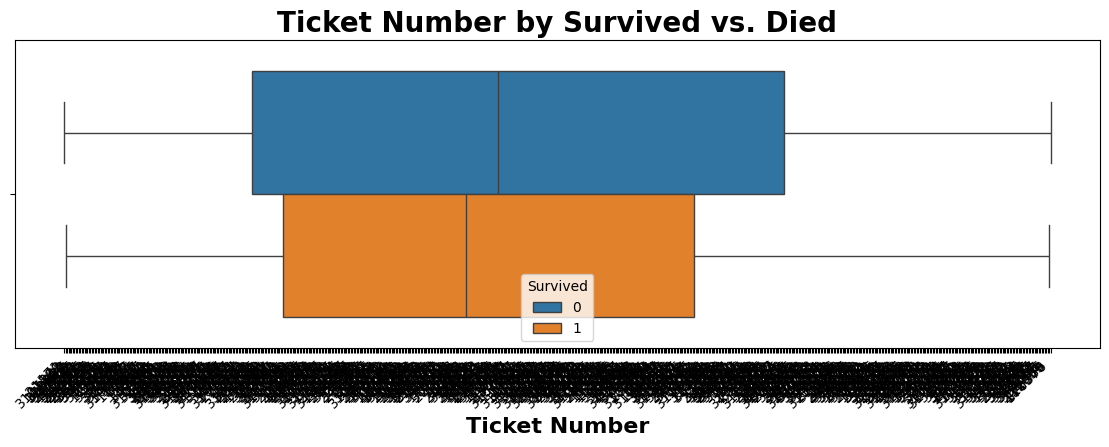

In [100]:
# Ticket by Survived vs. Died

plt.figure(figsize=(14,4))
ax = sns.boxplot(x=df_train['ticket_num'],hue=df_train['Survived'],orient="h");
plt.title('Ticket Number by Survived vs. Died',fontsize=20,fontweight='bold');
plt.xlabel('Ticket Number',fontsize=16,fontweight='bold');
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

In [38]:
# Preprocess df_train for correlation matrix/heatmap

df_train.head()

df_train_encoded = pd.get_dummies(df_train,drop_first=False,columns=['Sex','Embarked'],dtype=int)

df_train_encoded['Name'] = df_train_encoded['Name'].astype('category').cat.codes
df_train_encoded['Ticket'] = df_train_encoded['Ticket'].astype('category').cat.codes
df_train_encoded['Cabin'] = df_train_encoded['Cabin'].astype('category').cat.codes

display(df_train_encoded)

# Plot correlation matrix for the dataset

display(df_train_encoded.corr())

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,108,22.0,1,0,523,7.2500,-1,0,1,0,0,1
1,2,1,1,190,38.0,1,0,596,71.2833,81,1,0,1,0,0
2,3,1,3,353,26.0,0,0,669,7.9250,-1,1,0,0,0,1
3,4,1,1,272,35.0,1,0,49,53.1000,55,1,0,0,0,1
4,5,0,3,15,35.0,0,0,472,8.0500,-1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,27.0,0,0,101,13.0000,-1,0,1,0,0,1
887,888,1,1,303,19.0,0,0,14,30.0000,30,1,0,0,0,1
888,889,0,3,413,NaN,1,2,675,23.4500,-1,1,0,0,0,1
889,890,1,1,81,26.0,0,0,8,30.0000,60,0,1,1,0,0


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,1.000000,-0.005007,-0.035144,-0.038559,0.036847,-0.057527,-0.001652,-0.056554,0.012658,-0.000637,-0.042939,0.042939,-0.001205,-0.033606,0.022148
Survived,-0.005007,1.000000,-0.338481,-0.057343,-0.077221,-0.035322,0.081629,-0.164549,0.257307,0.276235,0.543351,-0.543351,0.168240,0.003650,-0.155660
Pclass,-0.035144,-0.338481,1.000000,0.052831,-0.369226,0.083081,0.018443,0.319869,-0.549500,-0.537419,-0.131900,0.131900,-0.243292,0.221009,0.081720
Name,-0.038559,-0.057343,0.052831,1.000000,0.062583,-0.017230,-0.049105,0.047348,-0.049173,0.003122,-0.020314,0.020314,0.000692,0.015296,-0.012936
Age,0.036847,-0.077221,-0.369226,0.062583,1.000000,-0.308247,-0.189119,-0.075934,0.096067,0.167432,-0.093254,0.093254,0.036261,-0.022405,-0.032523
SibSp,-0.057527,-0.035322,0.083081,-0.017230,-0.308247,1.000000,0.414838,0.079461,0.159651,-0.024829,0.114631,-0.114631,-0.059528,-0.026354,0.070941
Parch,-0.001652,0.081629,0.018443,-0.049105,-0.189119,0.414838,1.000000,0.020003,0.216225,0.033585,0.245489,-0.245489,-0.011069,-0.081228,0.063036
Ticket,-0.056554,-0.164549,0.319869,0.047348,-0.075934,0.079461,0.020003,1.000000,-0.013885,-0.176515,-0.059372,0.059372,-0.021381,0.064396,-0.014082
Fare,0.012658,0.257307,-0.549500,-0.049173,0.096067,0.159651,0.216225,-0.013885,1.000000,0.310987,0.182333,-0.182333,0.269335,-0.117216,-0.166603
Cabin,-0.000637,0.276235,-0.537419,0.003122,0.167432,-0.024829,0.033585,-0.176515,0.310987,1.000000,0.137704,-0.137704,0.106151,-0.098339,-0.031604


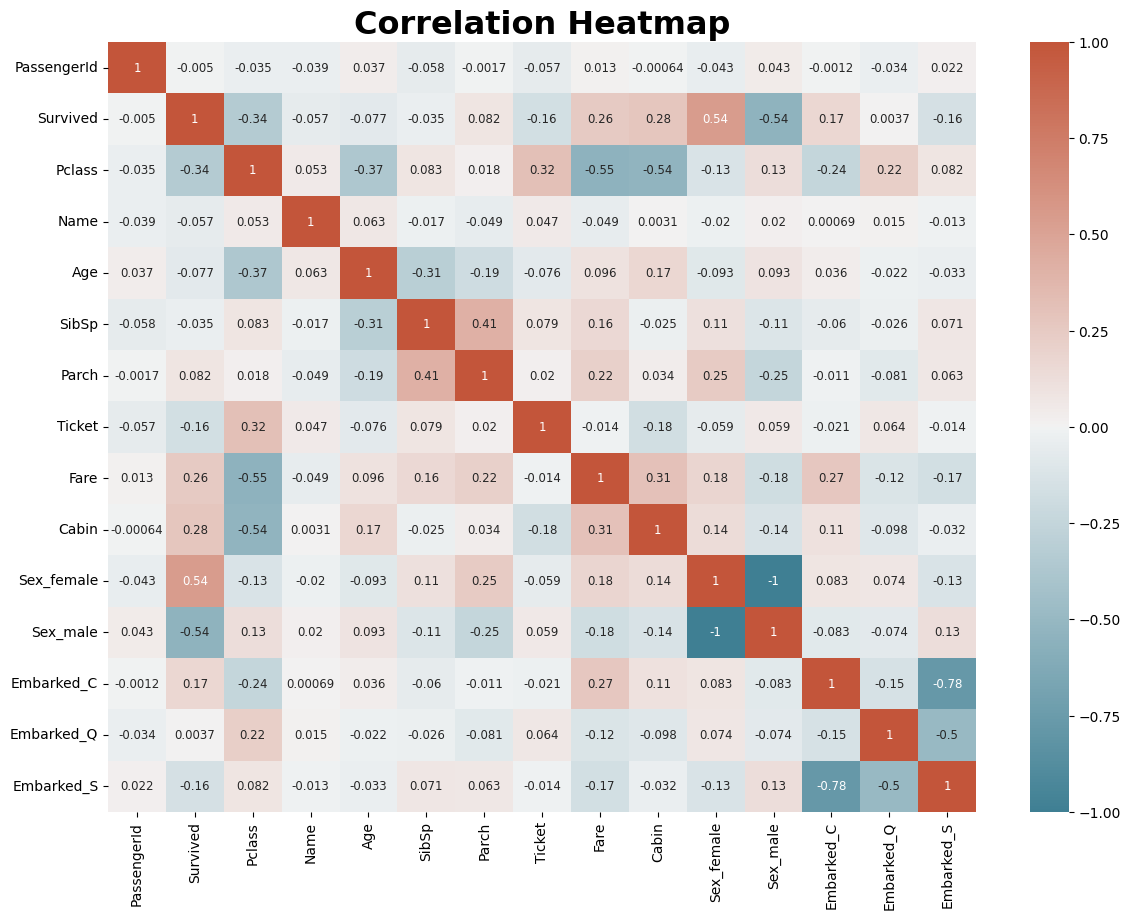

In [42]:
# Plot correlation heatmap for the dataset

plt.figure(figsize=(14,10))
ax = sns.heatmap(df_train_encoded.corr(), vmin=-1, vmax=1, annot=True, annot_kws={"size": 8.5}, cmap = sns.diverging_palette(220, 20, as_cmap=True))
plt.title('Correlation Heatmap', fontsize=23, fontweight='bold')
plt.show()

# Predictive Modeling

## K-Means Clustering

In [ ]:
# Selecting relevant features for clustering
features = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]

# Numerical features to be scaled
numerical_features = features.select_dtypes(include=['int64', 'float64']).columns

# Categorical features to be one-hot encoded
categorical_features = features.select_dtypes(include=['object']).columns

# Building the Column Transformer with Pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Fitting and transforming the data
X_processed = preprocessor.fit_transform(features)

# Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_processed)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Determine the number of principal components
# Plotting the cumulative sum of explained variance
plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

# Choose the number of components based on the plot
n_components = # [your chosen number of components]

# Apply PCA with the chosen number of components
pca = PCA(n_components=n_components)
X_pca_reduced = pca.fit_transform(X_scaled)

# Now, you can proceed with the Elbow Method and K-means clustering
# Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Get silhouette scores for each n-cluster model

def kmeans_sil(num_clusters, x_vals):
    '''
    Fits a KMeans model for different values of k.
    Calculates a silhouette score for each k value
    Args:
        num_clusters: (list of ints)  - The different k values to try
        x_vals:       (array)         - The training data

    Returns: 
        sil_score:    (list)          - A list of silhouette scores, one for each value of k
    '''
    sil_score = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42)
        kms.fit(x_vals)
        sil_score.append(silhouette_score(x_vals, kms.labels_))
    return sil_score

# Calculate silhouette scores for k=2-10
sil_score = kmeans_sil(num_clusters, tfidf_matrix)
print(sil_score)

# Create a line plot of silhouette scores 
plot = sns.lineplot(x=num_clusters, y=sil_score)
plot.set_xlabel("# of clusters");
plot.set_ylabel("Silhouette Score");
plot.set_title("Silhouette Plot",fontweight='bold')

In [ ]:
# Plot cluster analysis diagram

num_clusters = 5

# Plotting
plt.figure(figsize=(10, 10))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# Calculate the range for ticks
x_range = np.ptp(x_vals)  # Peak to peak (max - min) range for x
y_range = np.ptp(y_vals)  # Peak to peak (max - min) range for y

# Setting ticks based on the range
x_ticks = np.linspace(min(x_vals), max(x_vals), num=5)  # 5 ticks across the range
y_ticks = np.linspace(min(y_vals), max(y_vals), num=5)  # 5 ticks across the range

for i in range(num_clusters):
        cluster_indices = [idx for idx, val in enumerate(clusters_5) if val == i]
        plt.scatter([x_vals[j] for j in cluster_indices], [y_vals[j] for j in cluster_indices], c=colors[i % len(colors)], label=f'Cluster {i}')

plt.xticks(x_ticks)
plt.yticks(y_ticks)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Clusters of Sentences (k=5)',fontweight='bold')
plt.legend()
plt.show()

## Random Forest Model

In [45]:
# Define function that creates a performance metrics table based on Accuracy score optimization given a fitted model to 
# use to compare performance across all constructed models

def make_results(model_name, model_object):
    '''
    Accepts as arguments a model name (your choice - string) and
    a fit GridSearchCV model object.

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean F1 score across all validation folds.
    '''

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(mean f1 score)
    best_estimator_results = cv_results.iloc[cv_results['mean_test_accuracy'].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
    roc_auc = best_estimator_results.mean_test_roc_auc
    
    # Create table of results
    table = pd.DataFrame({'Model': [model_name],
                          'Accuracy': [accuracy],
                          'F1': [f1],
                          'Recall': [recall],
                          'Precision': [precision],
                          'ROC/AUC': [roc_auc]
                         }
                        )

    return table

In [46]:
# Define function to calculate confusion matrix values and plot confusion matrix representing the averages of the
# values taken from each round of accuracy refit cross-validation for the best model

def make_cv_confusion_matrix(cv_object,y_train):
    
    '''Takes a fitted cv grid search object (i.e. dt_cv) and total number of outcome (y-variable) data points in the
    training dataset (i.e. y_train.shape[0]) and outputs a confusion matrix that represents averaged values from 
    all rounds of cross-validation'''
    
    # Create variable for total number of training set observations
    total_train_obs = y_train.shape[0]
    
    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(cv_object.cv_results_)

    # Isolate the row of the df with the max(mean recall score)
    best_estimator_results = cv_results.iloc[cv_results['mean_test_accuracy'].idxmax(), :]
    
    # Isolate mean recall, precision, and accuracy scores from the best model's cross-validation
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
    
    # Calculate values for the confusion matrix
    true_positives = ((precision * recall) * (total_train_obs - (accuracy * total_train_obs))) / (recall - (2 * recall * precision) + precision)
    false_positives = round((true_positives - (precision * true_positives)) / precision, 0)
    false_negatives = round((true_positives - (recall * true_positives)) / recall, 0)
    true_negatives = round((accuracy * total_train_obs) - true_positives, 0)
    true_positives = round(true_positives, 0)
    predictions_list = [true_negatives,false_positives,false_negatives,true_positives]
    predictions_matrix = np.array(predictions_list).reshape(2,2)
    
    # Plot confusion matrix
    plt.figure(figsize=(5,4))
    ax = sns.heatmap(predictions_matrix, vmin=0, vmax=total_train_obs, annot=True, 
                     cmap = sns.color_palette("mako", as_cmap=True), fmt='g')
    plt.title('Confusion Matrix', fontsize=16)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    
    return plt.show()

In [49]:
# Define X and y variables for Random Forest model

df_rf = df_train_encoded.dropna()

X_rf = df_rf.drop(columns='Survived')

y_rf = df_rf[['Survived']]

display(X_rf.head())
display(y_rf.head())

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,3,108,22.0,1,0,523,7.2500,-1,0,1,0,0,1
1,2,1,190,38.0,1,0,596,71.2833,81,1,0,1,0,0
2,3,3,353,26.0,0,0,669,7.9250,-1,1,0,0,0,1
3,4,1,272,35.0,1,0,49,53.1000,55,1,0,0,0,1
4,5,3,15,35.0,0,0,472,8.0500,-1,0,1,0,0,1


,Survived
0,0
1,1
2,1
3,1
4,0


In [44]:
# Instantiate the Random Forest model

rf = RandomForestClassifier(random_state=42)

In [71]:
# Define ranges of cross-validation hyperparameters to use in GridSearch to choose the best model

cv_params = {'max_depth': [7,8,None], 
             'min_samples_leaf': [1,2],
             'min_samples_split': [2,3],
             'max_features': ['sqrt',None,'log2'],
             'n_estimators': [400,500,600],
             'max_samples': [None]
             }  

# Define scoring metrics to calculate for the model

scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']


# Create the GridSearch object to perform GridSearch while fitting the model

rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='accuracy')

In [72]:
# Convert y_train to a flattened np array

y_rf = y_rf.values.ravel()

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [73]:
# Fit the cv model

rf_cv.fit(X_rf,y_rf)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [7, 8, None],
                         'max_features': ['sqrt', None, 'log2'],
                         'max_samples': [None], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [400, 500, 600]},
             refit='accuracy',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [78]:
# Get results table for the fitted model

make_results('Random Forest CV', rf_cv)

,Model,Accuracy,F1,Recall,Precision,ROC/AUC
0,Random Forest CV,0.816567,0.744293,0.686207,0.846045,0.873447


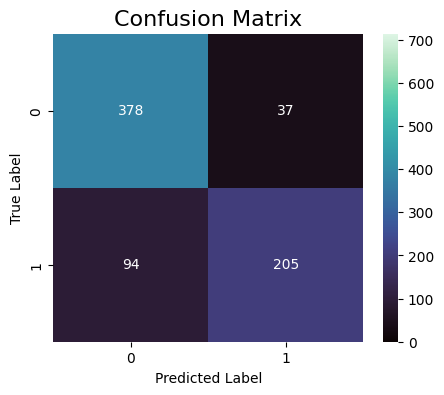

In [79]:
# Plot CV confusion matrix for the fitted model

make_cv_confusion_matrix(rf_cv,y_rf)

In [80]:
# Identify the best combination of hyperparameters defined by the GridSearch

rf_cv.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'max_samples': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}

In [83]:
# Identify most important X-variables (features) in the Random Forest model and put in a table

rf_importances = pd.DataFrame(rf_cv.best_estimator_.feature_importances_)

rf_importances = rf_importances.rename(columns={0:"mean_dec_impurity"})
rf_importances.insert(0, "features", X_rf.columns)
rf_importances = rf_importances.sort_values(by='mean_dec_impurity',ascending=False).reset_index(drop=True)

display(rf_importances)

,features,mean_dec_impurity
0,Sex_female,0.129924
1,Ticket,0.124661
2,Sex_male,0.123379
3,Fare,0.115049
4,Age,0.115001
5,Name,0.102530
6,PassengerId,0.098052
7,Pclass,0.063230
8,Cabin,0.054862
9,SibSp,0.025637


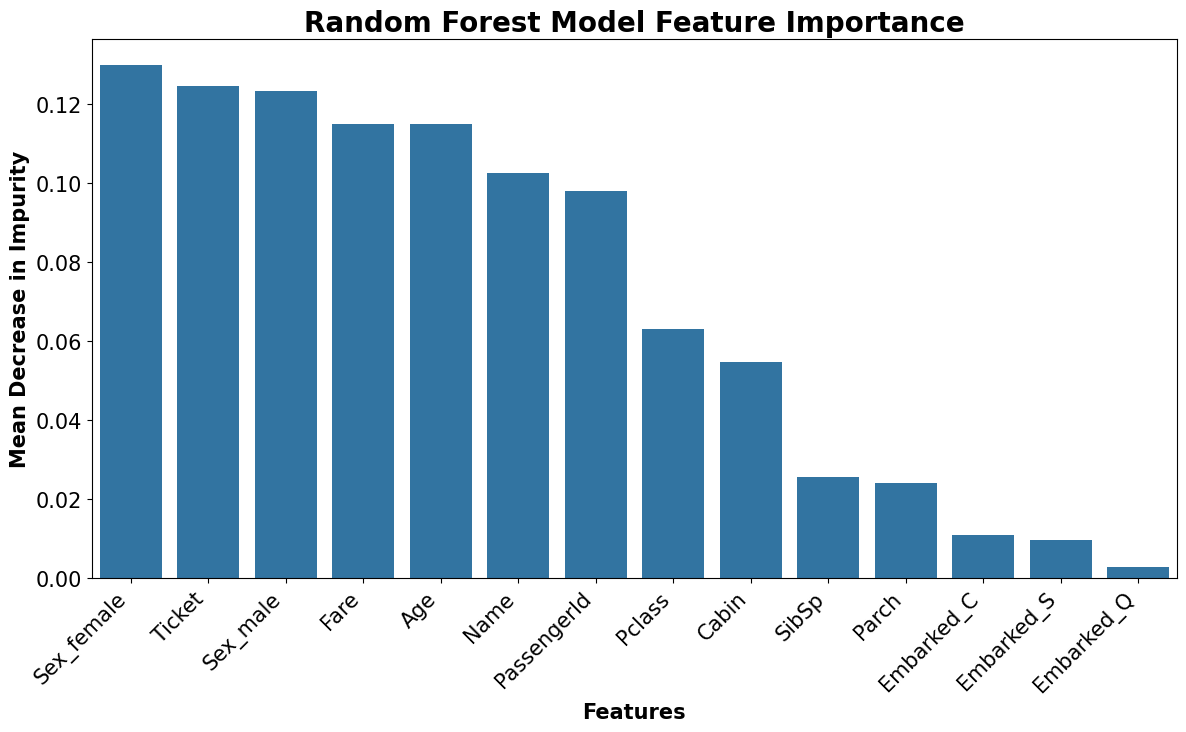

In [84]:
# Plot feature importance for the Random Forest model; this plot shows the impact each predictor 
# variable has on the model for predicting the outcome variable

plt.figure(figsize=(14,7))
ax = sns.barplot(x=rf_importances['features'],y=rf_importances['mean_dec_impurity'])
plt.title("Random Forest Model Feature Importance",fontsize=20,fontweight='bold')
plt.xlabel("Features",fontsize = 15,fontweight='bold')
plt.ylabel("Mean Decrease in Impurity",fontsize = 15,fontweight='bold')
plt.xticks(rotation=45, horizontalalignment='right')
ax.tick_params(axis='both', which='major', labelsize=15)
plt.show()

# XGBoost Model

In [68]:
# Define X and y variables for XGBoost model

df_xgb = df_train_encoded.copy()

df_xgb = df_xgb.drop(fare_outliers.index,axis=0)

for x in age_outliers.index:
    if x in df_xgb.index:
        df_xgb.drop(x,axis=0)
    else:
        None

for x in sibsp_outliers.index:
    if x in df_xgb.index:
        df_xgb.drop(x,axis=0)
    else:
        None

df_xgb = df_xgb.dropna()

X_xgb = df_xgb.drop(columns='Survived')

y_xgb = df_xgb[['Survived']]

display(X_xgb.head())
display(y_xgb.head())

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,3,108,22.0,1,0,523,7.2500,-1,0,1,0,0,1
2,3,3,353,26.0,0,0,669,7.9250,-1,1,0,0,0,1
3,4,1,272,35.0,1,0,49,53.1000,55,1,0,0,0,1
4,5,3,15,35.0,0,0,472,8.0500,-1,0,1,0,0,1
6,7,1,515,54.0,0,0,85,51.8625,129,0,1,0,0,1


,Survived
0,0
2,1
3,1
4,0
6,0


In [ ]:
# Instantiate the XGBoost model

xgb = XGBClassifier(objective='binary:logistic', random_state=42)

In [ ]:
# Define ranges of cross-validation hyperparameters to use in GridSearch to choose the best model

cv_params = {'max_depth': [6], 
             'min_child_weight': [0.4],
             'learning_rate': [0.1],
             'n_estimators': [100],
             'colsample_bytree': [0.4]
             }    

# Define scoring metrics to calculate for the model

scoring = {'accuracy', 'precision', 'recall', 'f1','roc_auc'}


# Create the GridSearch object to perform GridSearch while fitting the model

xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='accuracy')

In [ ]:
# Fit the model

xgb.fit(X_xgb, y_xgb)

In [ ]:
# Get results table for the fitted model

make_results('XGB CV', xgb_cv)

In [ ]:
# Plot CV confusion matrix for the fitted model

make_cv_confusion_matrix(xgb_cv,y_xgb)

In [ ]:
# Identify the best combination of hyperparameters defined by the GridSearch

xgb_cv.best_params_

In [ ]:
# Plot feature importance for the XGBoost model; this plot shows the impact each predictor 
# variable has on the model for predicting the outcome variable

ax = plot_importance(xgb_cv,height = 0.4)
fig = ax.figure
fig.set_size_inches(18, 12)
plt.title('XGB Model Feature Importance',fontsize = 28,fontweight='bold')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel('F Score',fontsize=17,fontweight='bold')
plt.ylabel('Features',fontsize=17,fontweight='bold')
ax.tick_params(axis='both', which='major', labelsize=15)